In [2]:
import pandas as pd

data = pd.read_csv("../../datasets/zuqiu/zuqiu.csv")
data.head(10)

,win,eq,lose,result
0,1.01,16.0,35.0,3
1,1.03,13.0,28.0,3
2,1.07,9.5,22.0,3
3,1.08,9.5,22.0,3
4,1.08,9.5,22.0,3
5,1.10,8.0,20.0,3
6,1.10,8.0,20.0,3
7,1.12,8.0,16.0,1
8,1.15,6.2,14.0,3
9,1.15,7.0,15.0,3


In [2]:
from pycaret.classification import *
clf1 = setup(data, target = 'result', session_id=123, log_experiment=True, experiment_name='zuqiu')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(942, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:42:38
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 6 of 10
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier
ETC,. . . . . . . . . . . . . . . . . .,50.4 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.5023,0.0,0.4540,0.4654,0.4507,0.1970,0.2197,0.0559
1,Linear Discriminant Analysis,0.4917,0.0,0.4324,0.3906,0.4063,0.1615,0.2040,0.0199
2,Ridge Classifier,0.4886,0.0,0.4272,0.3679,0.3939,0.1543,0.2008,0.0313
3,Gradient Boosting Classifier,0.4825,0.0,0.4483,0.4704,0.4633,0.1861,0.1920,0.2750
4,Ada Boost Classifier,0.4644,0.0,0.4191,0.4433,0.4304,0.1437,0.1535,0.2872
5,K Neighbors Classifier,0.4627,0.0,0.4278,0.4443,0.4405,0.1516,0.1562,0.0152
6,Light Gradient Boosting Machine,0.4566,0.0,0.4332,0.4479,0.4476,0.1579,0.1602,0.1348
7,SVM - Linear Kernel,0.4476,0.0,0.4055,0.3929,0.3606,0.1189,0.1631,0.0264
8,Extreme Gradient Boosting,0.4430,0.0,0.4148,0.4316,0.4309,0.1341,0.1363,0.1276
9,Extra Trees Classifier,0.4338,0.0,0.4026,0.4196,0.4180,0.1125,0.1155,0.4486


In [4]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [5]:
catb = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5373,0.0000,0.4798,0.5127,0.5025,0.2523,0.2663
1,0.5025,0.0000,0.4445,0.4594,0.4567,0.1943,0.2068
2,0.5398,0.0000,0.4818,0.5291,0.4925,0.2567,0.2734
3,0.5274,0.0000,0.4660,0.4810,0.4754,0.2344,0.2503
4,0.4613,0.0000,0.4058,0.4529,0.4168,0.1263,0.1355
5,0.5411,0.0000,0.4913,0.5483,0.5085,0.2613,0.2750
6,0.5112,0.0000,0.4475,0.4689,0.4645,0.2046,0.2196
7,0.4888,0.0000,0.4323,0.4386,0.4441,0.1763,0.1859
8,0.5337,0.0000,0.4778,0.5092,0.4961,0.2506,0.2629
9,0.5087,0.0000,0.4538,0.5011,0.4745,0.2021,0.2152


In [6]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5373,0.0000,0.4766,0.5070,0.4954,0.2507,0.2662
1,0.4950,0.0000,0.4381,0.4527,0.4479,0.1846,0.1960
2,0.5373,0.0000,0.4785,0.5213,0.4881,0.2529,0.2695
3,0.5348,0.0000,0.4711,0.4830,0.4788,0.2440,0.2625
4,0.4638,0.0000,0.4051,0.4485,0.4106,0.1274,0.1383
5,0.5187,0.0000,0.4707,0.5367,0.4837,0.2275,0.2400
6,0.5212,0.0000,0.4575,0.4908,0.4723,0.2182,0.2365
7,0.4763,0.0000,0.4209,0.4138,0.4259,0.1561,0.1657
8,0.5062,0.0000,0.4531,0.4913,0.4691,0.2047,0.2160
9,0.5037,0.0000,0.4486,0.4936,0.4685,0.1942,0.2067


In [7]:
tuned_catb = tune_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5274,0.0000,0.4667,0.4939,0.4879,0.2344,0.2488
1,0.5000,0.0000,0.4426,0.4547,0.4553,0.1932,0.2042
2,0.5199,0.0000,0.4656,0.4953,0.4794,0.2288,0.2407
3,0.5398,0.0000,0.4771,0.4843,0.4845,0.2544,0.2720
4,0.4763,0.0000,0.4159,0.4758,0.4248,0.1455,0.1585
5,0.5536,0.0000,0.4993,0.5439,0.5189,0.2806,0.2950
6,0.5112,0.0000,0.4469,0.4770,0.4608,0.2010,0.2186
7,0.5012,0.0000,0.4435,0.4442,0.4534,0.1976,0.2084
8,0.5237,0.0000,0.4711,0.5028,0.4939,0.2359,0.2458
9,0.5212,0.0000,0.4677,0.5387,0.4881,0.2234,0.2376


In [8]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5174,0.0000,0.4737,0.4994,0.5001,0.2343,0.2393
1,0.4527,0.0000,0.4119,0.4279,0.4351,0.1352,0.1373
2,0.5050,0.0000,0.4543,0.4718,0.4797,0.2142,0.2190
3,0.5124,0.0000,0.4671,0.4842,0.4921,0.2304,0.2340
4,0.4564,0.0000,0.4144,0.4356,0.4325,0.1333,0.1374
5,0.4938,0.0000,0.4589,0.4787,0.4825,0.2047,0.2066
6,0.4888,0.0000,0.4326,0.4430,0.4565,0.1827,0.1885
7,0.4539,0.0000,0.4102,0.4276,0.4374,0.1417,0.1431
8,0.4688,0.0000,0.4287,0.4477,0.4527,0.1644,0.1667
9,0.4788,0.0000,0.4420,0.4648,0.4644,0.1741,0.1772


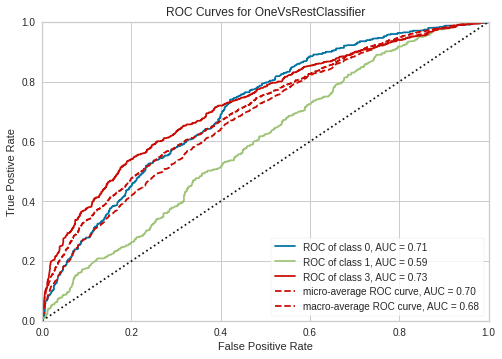

In [9]:
plot_model(tuned_catb)

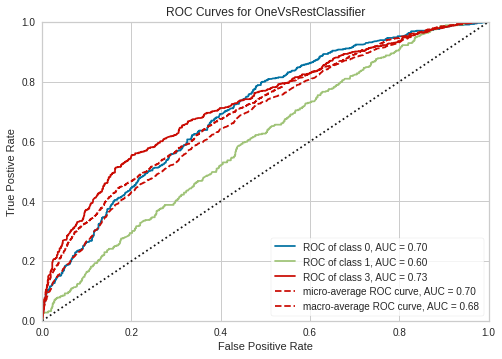

In [10]:
plot_model(gbc)

In [11]:
pre_data = pd.read_csv("../datasets/zuqiu/zuqiu.csv")
predict_model(tuned_catb, pre_data)

,win,eq,lose,result,Label
0,1.01,16.0,35.00,3,3
1,1.03,13.0,28.00,3,3
2,1.07,9.5,22.00,3,3
3,1.08,9.5,22.00,3,3
4,1.08,9.5,22.00,3,3
...,...,...,...,...,...
937,10.00,5.0,1.25,0,0
938,10.30,5.5,1.25,0,0
939,12.00,5.5,1.22,0,0
940,12.50,6.0,1.20,1,0


In [12]:
predict_model(tuned_gbc, pre_data)

,win,eq,lose,result,Label
0,1.01,16.0,35.00,3,3
1,1.03,13.0,28.00,3,3
2,1.07,9.5,22.00,3,3
3,1.08,9.5,22.00,3,3
4,1.08,9.5,22.00,3,3
...,...,...,...,...,...
937,10.00,5.0,1.25,0,0
938,10.30,5.5,1.25,0,0
939,12.00,5.5,1.22,0,0
940,12.50,6.0,1.20,1,0
